In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [39]:
stations <- bind_rows(
    read_csv("data/sdo_OBS_DEU_P1Y_RR.csv", col_types = "ncccnc"),
    read_csv("data/sdo_OBS_DEU_P1Y_SD.csv", col_types = "ncccnc"),
    read_csv("data/sdo_OBS_DEU_P1Y_T2M.csv", col_types = "ncccnc")
    ) %>%
    unique %>%
    mutate(
        long = parse_double(Geogr_Laenge, locale=locale(decimal_mark=",")),
        lat = parse_double(Geogr_Breite, locale=locale(decimal_mark=","))
    ) %>%
    select(station_id=SDO_ID, station_name=SDO_Name, lat, long, altitude=Hoehe_ueber_NN)

In [40]:
stations %>% head

station_id,station_name,lat,long,altitude
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
19127,Deiningen,48.8653,10.5704,423
16086,Barum-St. Dionys,53.3367,10.3906,4
15994,Sukow-Zietlitz,53.5696,11.5485,44
15965,"Brückenau, Bad (Elisabethenhof)",50.3102,9.7838,350
15991,Schönenberg-Kübelberg,49.4108,7.3346,253
19086,Ilmenau-Gabelbach,50.6700,10.8840,756


In [52]:
read_csv("data/data_OBS_DEU_P1Y_T2M.csv") %>% filter(lubridate::month(Zeitstempel)!=1)

Rows: 49739 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Produkt_Code
dbl  (4): SDO_ID, Wert, Qualitaet_Byte, Qualitaet_Niveau
date (1): Zeitstempel

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Byte,Qualitaet_Niveau
<chr>,<dbl>,<date>,<dbl>,<dbl>,<dbl>
OBS_DEU_P1Y_T2M,1358,1891-08-01,2.38,4,1
OBS_DEU_P1Y_T2M,2928,1863-12-01,7.18,4,1
OBS_DEU_P1Y_T2M,2928,1864-12-01,8.65,4,1
OBS_DEU_P1Y_T2M,2928,1865-12-01,9.25,4,1
OBS_DEU_P1Y_T2M,2928,1866-12-01,9.01,4,1
OBS_DEU_P1Y_T2M,2928,1867-12-01,9.62,4,1
OBS_DEU_P1Y_T2M,2928,1868-12-01,8.65,4,1
OBS_DEU_P1Y_T2M,2928,1869-12-01,7.54,4,1
OBS_DEU_P1Y_T2M,2928,1870-12-01,6.55,4,1


In [57]:
data <- bind_rows(
    read_csv("data/data_OBS_DEU_P1Y_T2M.csv") %>% filter(lubridate::month(Zeitstempel)==1) %>% transmute(station_id=SDO_ID, year = lubridate::year(Zeitstempel), Wert, type="temperature"),
    read_csv("data/data_OBS_DEU_P1Y_SD.csv") %>% transmute(station_id=SDO_ID, year = lubridate::year(Zeitstempel), Wert, type="sunshine"),
    read_csv("data/data_OBS_DEU_P1Y_RR.csv") %>% transmute(station_id=SDO_ID, year = lubridate::year(Zeitstempel), Wert, type="precipitation")
    ) %>%
    group_by(station_id,year) %>%
    pivot_wider(values_from=Wert, names_from=type)

Rows: 49739 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Produkt_Code
dbl  (4): SDO_ID, Wert, Qualitaet_Byte, Qualitaet_Niveau
date (1): Zeitstempel

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 18807 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Produkt_Code
dbl  (4): SDO_ID, Wert, Qualitaet_Byte, Qualitaet_Niveau
date (1): Zeitstempel

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 291951 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Produkt_Code
dbl  (4): SDO_ID, Wert, Qualitaet_Byte, Qualitaet_Niveau
date (1): Zeitstempel

ℹ Use `spec()` to retriev

In [58]:
data %>% head

station_id,year,temperature,sunshine,precipitation
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1931,7.52,NA,799.3
1,1932,8.12,NA,640.4
1,1933,7.68,NA,750.1
1,1934,9.31,NA,638.8
1,1935,8.41,NA,824.7
1,1936,8.59,NA,891.5


In [62]:
data <- left_join(data, stations)

Joining, by = "station_id"


In [63]:
data %>% write_tsv("annual_weather_data_germany.tsv")

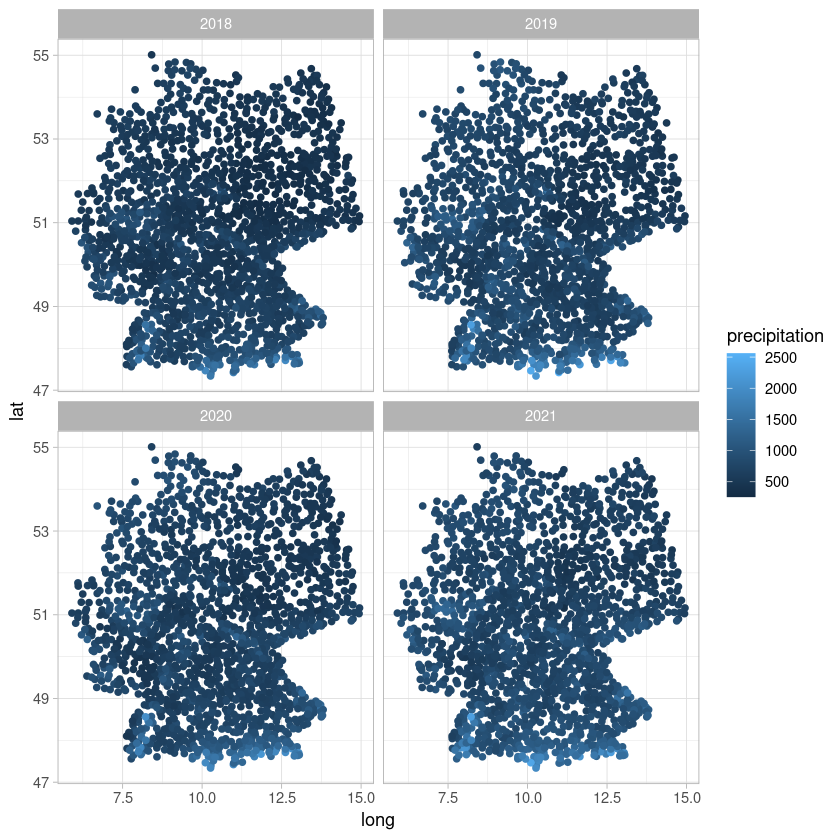

In [69]:
data %>% filter(year>2017, !is.na(precipitation)) %>% ggplot(aes(long, lat, color=precipitation)) + geom_point() + theme_light() + facet_wrap(.~year)